In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)







170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    steps_per_epoch=len(train_images) / 64, epochs=50,
                    validation_data=(test_images, test_labels))

# Plot training/validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

# Save the model
model.save('cifar10_model.h5')

# Visualize model architecture
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('/content/cifar10_model.h5')

# Now, you can use the loaded model for predictions or further training


In [ ]:
import numpy as np


1/1 [==============================] - 0s 235ms/step


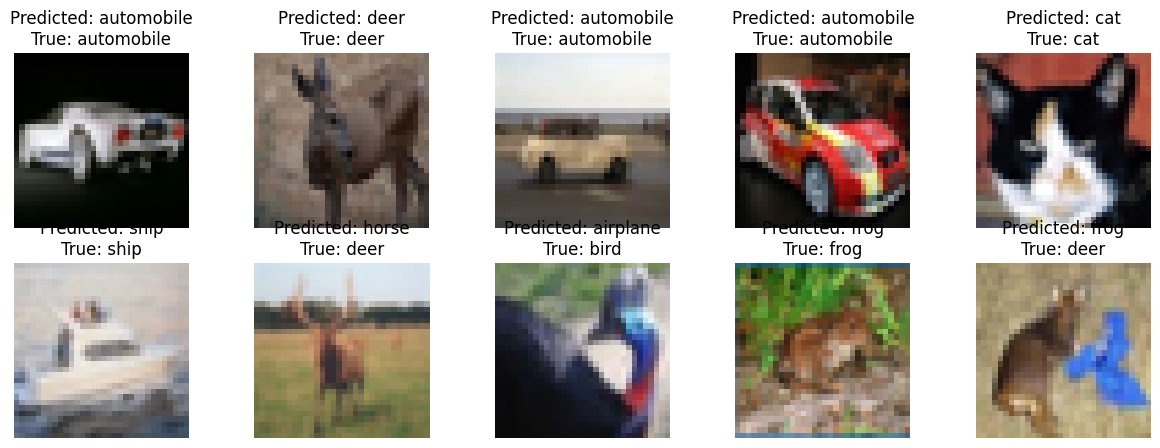

In [ ]:
# Choose some random images from the test set
num_images = 10
random_indices = np.random.choice(len(test_images), num_images, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions using the trained model
predictions = model.predict(sample_images)

# Decode one-hot encoded labels
decoded_labels = np.argmax(sample_labels, axis=1)

# Get class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the images with their predicted and true labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    predicted_label = np.argmax(predictions[i])
    true_label = decoded_labels[i]
    plt.title(f'Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}')
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 23ms/step
Predicted Label: airplane


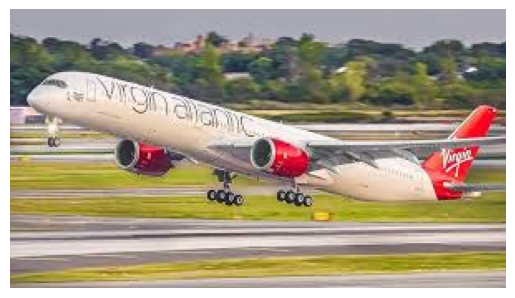

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = 't1.jpeg'
img = image.load_img(img_path, target_size=(32, 32))  # Resizing image to match CIFAR-10 dimensions
img_array = image.img_to_array(img)

# Normalize the image
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Make predictions using the trained model
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Map predicted class to corresponding label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = class_names[predicted_class]

print("Predicted Label:", predicted_label)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from file
img = mpimg.imread('t1.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
